## TODO:  
- allow for total reads or coverage approach
- for total reads, a per chromosome (fastq entry) estimate of progress will be made
- calculate coverage as total reads x coverage value = total reads

In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../raw_data/samples/raw_digest_df.csv')
df.head()

,sequence,r1_id,r2_id,length,fragment_length
0,ACACTCTTTCCCTACACGACGCTCTTCCGATCTCACGTAGTCTTGG...,GTCTTGG,GATCAAG,102,1
1,ACACTCTTTCCCTACACGACGCTCTTCCGATCTAGGAGTAATCAGG...,AATCAGG,TCACCAC,102,1
2,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGGCTTGGAATTC...,GGAATTC,GCACGAAC,103,1
3,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTACCTCAGGATAC...,AGGATAC,TAACGCC,103,2
4,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGATCGTTGATCG...,TTGATCG,AGGATAC,104,3


<AxesSubplot:>

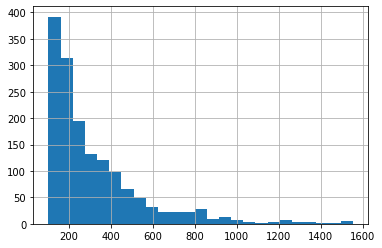

In [3]:
read_count = len(df)
df['length'].hist(bins=25)

In [ ]:
ax = df['length'].hist(bins=25)
fig = ax.get_figure()
fig.savefig('./raw_digest.pdf')

### define mean and sd (simulates size selection e.g., Blue-Pippin)

In [4]:
mean = 400
sd = 100
#total_reads = read_count * 20
total_reads = 300000

[351, 125, 451, 430, 342, 303, 413, 380, 462, 449, 216, 395, 402, 492, 302, 585, 236, 367, 380, 306, 324, 347, 367, 493, 397, 382, 345, 555, 385, 451, 362, 531, 431, 349, 586, 616, 339, 425, 326, 485, 512, 278, 363, 380, 422, 415, 427, 484, 236, 403]


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

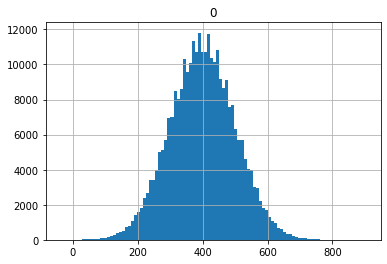

In [5]:
draw_ls = np.random.normal(loc=mean,scale=sd,size=total_reads)
draw_ls = [round(i) for i in draw_ls]
print(draw_ls[:50])

draw_dt = {}

for i in range(max(min(df['length']), min(draw_ls)), min(max(df['length']), max(draw_ls))+1):
    draw_dt[i] = draw_ls.count(i)

tmp_df = pd.DataFrame(draw_ls)
tmp_df.hist(bins=sd)

### sort df by length

In [6]:
df.sort_values(['length'], ascending=[True], inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,sequence,r1_id,r2_id,length,fragment_length
0,ACACTCTTTCCCTACACGACGCTCTTCCGATCTCACGTAGTCTTGG...,GTCTTGG,GATCAAG,102,1
1,ACACTCTTTCCCTACACGACGCTCTTCCGATCTAGGAGTAATCAGG...,AATCAGG,TCACCAC,102,1
2,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGGCTTGGAATTC...,GGAATTC,GCACGAAC,103,1
3,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTACCTCAGGATAC...,AGGATAC,TAACGCC,103,2
4,ACACTCTTTCCCTACACGACGCTCTTCCGATCTTGATCGTTGATCG...,TTGATCG,AGGATAC,104,3


### sample actual reads (good for visual, but data object can be large)

In [7]:
sampled_seqs = pd.DataFrame(columns=['sequence', 'r1_id', 'r2_id', 'length'])

for length, draws in draw_dt.items():
    tmp_df =  df.loc[df['length'] == length]
    if len(tmp_df) == 0:
        continue
    sampled_df = tmp_df.sample(n=draws, replace=True)
    sampled_seqs = pd.concat([sampled_seqs, sampled_df])

print(f'the length of sample_seqs is {len(sampled_seqs)}')

the length of sample_seqs is 236541


<AxesSubplot:>

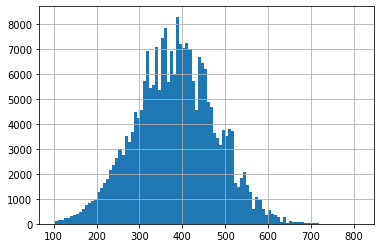

In [8]:
sampled_seqs['length'].hist(bins=sd)

### sample reads using intersection of fragment/sampling distributions
automatically size to include all fragments in mean + sd range  
this mimics real gel size selection as all of the target fragments should be included near the mean while the shorter fragments, which are likely to be very abundant, will be represented as a fraction

In [63]:
# try creating draw_ls until mean + 2sd are not hindered by number of draws

total_reads=10
keep_going = True

while keep_going is True:
    keep_going = False
    draw_ls = np.random.normal(loc=mean,scale=sd,size=total_reads)
    draw_ls = [round(i) for i in draw_ls]
    for i in range(mean, mean + (2*sd)):
        len_count = df[df.length == i].shape[0]
        #print(f'i: {i} data: {len_count} draws: {draw_ls.count(i)}')
        if len_count > draw_ls.count(i):
            total_reads += 10
            print(total_reads)
            keep_going = True
            break

20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2220
2

In [64]:
draw_dt = {}
for i in range(min(draw_ls), max(draw_ls)+1):
    draw_counts = draw_ls.count(i)
    data_counts = df[df.length == i].shape[0]
    print(f'{i} bp   draw: {draw_counts}   data: {data_counts}')
    draw_dt[i] = min(draw_counts, data_counts)

25 bp   draw: 1   data: 0
26 bp   draw: 0   data: 0
27 bp   draw: 0   data: 0
28 bp   draw: 0   data: 0
29 bp   draw: 0   data: 0
30 bp   draw: 0   data: 0
31 bp   draw: 0   data: 0
32 bp   draw: 0   data: 0
33 bp   draw: 0   data: 0
34 bp   draw: 0   data: 0
35 bp   draw: 0   data: 0
36 bp   draw: 0   data: 0
37 bp   draw: 0   data: 0
38 bp   draw: 0   data: 0
39 bp   draw: 0   data: 0
40 bp   draw: 0   data: 0
41 bp   draw: 0   data: 0
42 bp   draw: 0   data: 0
43 bp   draw: 0   data: 0
44 bp   draw: 0   data: 0
45 bp   draw: 0   data: 0
46 bp   draw: 0   data: 0
47 bp   draw: 0   data: 0
48 bp   draw: 1   data: 0
49 bp   draw: 0   data: 0
50 bp   draw: 0   data: 0
51 bp   draw: 1   data: 0
52 bp   draw: 0   data: 0
53 bp   draw: 0   data: 0
54 bp   draw: 0   data: 0
55 bp   draw: 0   data: 0
56 bp   draw: 0   data: 0
57 bp   draw: 0   data: 0
58 bp   draw: 0   data: 0
59 bp   draw: 0   data: 0
60 bp   draw: 0   data: 0
61 bp   draw: 0   data: 0
62 bp   draw: 0   data: 0
63 bp   draw

521 bp   draw: 8   data: 2
522 bp   draw: 5   data: 0
523 bp   draw: 2   data: 0
524 bp   draw: 8   data: 2
525 bp   draw: 6   data: 0
526 bp   draw: 6   data: 1
527 bp   draw: 7   data: 0
528 bp   draw: 6   data: 0
529 bp   draw: 3   data: 0
530 bp   draw: 12   data: 1
531 bp   draw: 5   data: 1
532 bp   draw: 9   data: 0
533 bp   draw: 6   data: 0
534 bp   draw: 12   data: 3
535 bp   draw: 5   data: 0
536 bp   draw: 6   data: 0
537 bp   draw: 5   data: 1
538 bp   draw: 6   data: 1
539 bp   draw: 8   data: 1
540 bp   draw: 11   data: 0
541 bp   draw: 2   data: 0
542 bp   draw: 6   data: 1
543 bp   draw: 3   data: 1
544 bp   draw: 4   data: 1
545 bp   draw: 3   data: 1
546 bp   draw: 5   data: 0
547 bp   draw: 6   data: 1
548 bp   draw: 2   data: 0
549 bp   draw: 2   data: 1
550 bp   draw: 4   data: 1
551 bp   draw: 7   data: 1
552 bp   draw: 5   data: 1
553 bp   draw: 5   data: 0
554 bp   draw: 2   data: 0
555 bp   draw: 2   data: 2
556 bp   draw: 3   data: 0
557 bp   draw: 3   data: 

In [65]:
#draw_dt = {}

#for i in range(max(min(df['length']), min(draw_ls)), min(max(df['length']), max(draw_ls))+1):
#    draw_dt[i] = draw_ls.count(i)

In [66]:
sampled_seqs = pd.DataFrame(columns=['sequence', 'r1_id', 'r2_id', 'length'])

for length, draws in draw_dt.items():
    tmp_df =  df.loc[df['length'] == length]
    if len(tmp_df) == 0:
        continue
    sampled_df = tmp_df.sample(n=draws, replace=True)
    sampled_seqs = pd.concat([sampled_seqs, sampled_df])

print(f'the length of sample_seqs is {len(sampled_seqs)}')

the length of sample_seqs is 716


### original fragments

<AxesSubplot:>

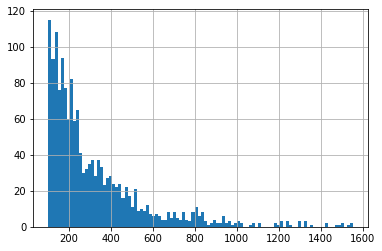

In [67]:
df['length'].hist(bins=sd)

<AxesSubplot:>

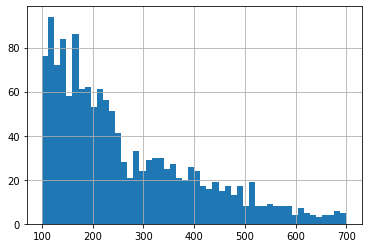

In [68]:
df['length'].hist(range=[100, 700], bins=50)

### sampling distribution

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

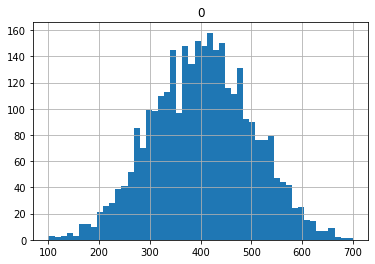

In [69]:
tmp_df = pd.DataFrame(draw_ls)
tmp_df.hist(range=[100, 700], bins=50)

<AxesSubplot:>

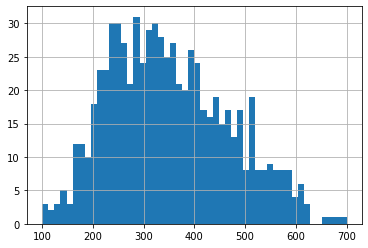

In [70]:
sampled_seqs['length'].hist(range=[100, 700], bins=50)

### sample idices (more compact)

In [17]:
sampled_seqs = pd.DataFrame(columns=['sequence', 'r1_id', 'r2_id', 'length'])
counts = []

for length, draws in draw_dt.items():
    tmp_df =  df.loc[df['length'] == length]
    if len(tmp_df) == 0:
        continue
    indices = [i for i in range(len(tmp_df))]
    sampled_idx = random.choices(indices, k=draws)
    counts += [sampled_idx.count(idx) for idx in indices]
    #tmp_df['counts'] = new_col
    sampled_seqs = pd.concat([sampled_seqs, tmp_df])

sampled_seqs['counts'] = counts

print(f'the length of sample_seqs is {len(sampled_seqs)}')
print(sampled_seqs['counts'].sum())

the length of sample_seqs is 0
0.0


### drop the unused reads

In [18]:
index_names = sampled_seqs[sampled_seqs['counts'] == 0].index

sampled_seqs.drop(index_names, inplace=True)

print(f'the length of sample_seqs is {len(sampled_seqs)}')
print(sampled_seqs['counts'].sum())
sampled_seqs.head()

the length of sample_seqs is 0
0.0


,sequence,r1_id,r2_id,length,counts
